<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/12_tf_obj_1/Infer%20using%20pretrained%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/12_tf_obj_1/installation
     
 - Select the right file and run
 
     - chmod +x install_cuda10.sh && ./install_cuda10.sh

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# Only for COLAB
# Switch to TF 1.0 version (Uncomment the following line)

#%tensorflow_version 1.x

# Now reset the runetime if prompted by colab

In [ ]:
# Check TF version
import tensorflow as tf
print(tf.__version__)

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/12_tf_obj_1/installation && chmod +x install_colab.sh && ./install_colab.sh
# Restart colab runtime now

# For Local systems and cloud select the right CUDA version
# ! cd Monk_Object_Detection/12_tf_obj_1/installation && chmod +x install_cuda10.sh && ./install_cuda10.sh

In [ ]:
# Inference

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/12_tf_obj_1/lib/")

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.list_pretrained_models();

1. Model Name: ssd_mobilenet_v1
2. Model Name: ssd_mobilenet_v2
3. Model Name: ssd_mobilenet_v1_ppn
4. Model Name: ssd_mobilenet_v1_fpn
5. Model Name: ssd_resnet50_v1_fpn
6. Model Name: ssd_mobilenet_v1_0.75_depth
7. Model Name: ssd_mobilenet_v1_quantized
8. Model Name: ssd_mobilenet_v1_0.75_depth_quantized
9. Model Name: ssd_mobilenet_v2_quantized
10. Model Name: ssdlite_mobilenet_v2
11. Model Name: ssd_inception_v2
12. Model Name: faster_rcnn_inception_v2
13. Model Name: faster_rcnn_resnet50
14. Model Name: faster_rcnn_resnet50_lowproposals
15. Model Name: rfcn_resnet101
16. Model Name: faster_rcnn_resnet101
17. Model Name: faster_rcnn_resnet101_lowproposals
18. Model Name: faster_rcnn_inception_resnet_v2_atrous
19. Model Name: faster_rcnn_inception_resnet_v2_atrous_lowproposals
20. Model Name: faster_rcnn_nas
21. Model Name: faster_rcnn_nas_lowproposals
22. Model Name: ssd_mobilenet_v2_mnasfpn
23. Model Name: ssd_mobilenet_v3_large
24. Model Name: ssd_mobilenet_v3_small


In [5]:
# To load a default pretrained model 
gtf.set_pretrained_model_params(model_name="ssd_mobilenet_v1")


# To load a custom model trained using monk
# gtf.set_model_params('export_dir/frozen_inference_graph.pb', "ship/classes.txt")

Model Download
Model name set as ssd_mobilenet_v1_coco_2018_01_28
Instructions for updating:
Use tf.gfile.GFile.




Image loaded in 0.024141550064086914 sec
Predicted in 4.276705026626587 sec
Inference printed on image in 0.3352503776550293 sec


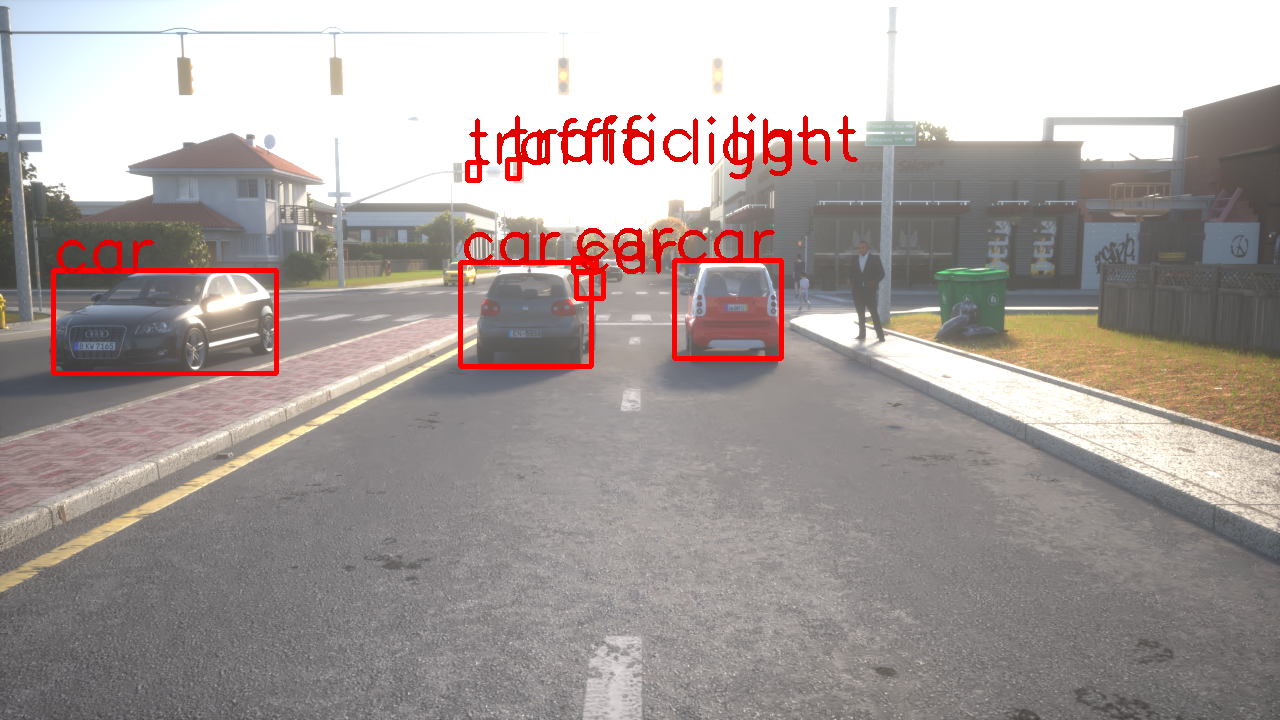

In [6]:
scores, bboxes, labels = gtf.infer_on_image('test.png', output_img_path="output.png", thresh=0.1, 
                                            bbox_thickness=3, text_size=2, text_thickness=4);
from IPython.display import Image
Image(filename='output.png') 

In [7]:
out = gtf.infer_on_folder('test_folder', output_folder_path='result', thresh=0.1, 
                                            bbox_thickness=3, text_size=2, text_thickness=4);

100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

Outputs stored at folder - result


# Download Sample Validation Dataset
 - Credits: https://pjreddie.com/projects/pascal-voc-dataset-mirror/

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QvVDAKiuaDIkk8gcSQfFn6eok3pT08zF' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1QvVDAKiuaDIkk8gcSQfFn6eok3pT08zF" -O pascal_voc_sample.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq pascal_voc_sample.zip

In [8]:
image_folder = "val/images";
gt_folder = "val/gt";

mAP, ap_dictionary, lamr_dictionary = gtf.evaluate_on_folder(image_folder, gt_folder, 
                                                                output_folder_path='eval_result', 
                                                                thresh=0.1,
                                                                iou_thresh=0.5,
                                                                bbox_thickness=3, 
                                                                text_size=2, 
                                                                text_thickness=4);

100%|██████████| 112/112 [00:00<00:00, 2240.48it/s]


Outputs stored at folder - eval_result
0.00% = aeroplane AP 
44.44% = bicycle AP 
57.14% = bird AP 
20.00% = boat AP 
30.00% = bottle AP 
42.86% = bus AP 
54.70% = car AP 
71.72% = cat AP 
22.32% = chair AP 
50.00% = cow AP 
0.00% = diningtable AP 
79.56% = dog AP 
87.50% = horse AP 
0.00% = motorbike AP 
49.36% = person AP 
0.00% = pottedplant AP 
50.00% = sheep AP 
0.00% = sofa AP 
66.67% = train AP 
0.00% = tvmonitor AP 
mAP = 36.31%


In [9]:
mAP, ap_dictionary, lamr_dictionary

(0.3631336454428563,
 {'aeroplane': 0.0,
  'bicycle': 0.4444444444444444,
  'bird': 0.5714285714285714,
  'boat': 0.2,
  'bottle': 0.3,
  'bus': 0.42857142857142855,
  'car': 0.5469599604547701,
  'cat': 0.7171717171717171,
  'chair': 0.2232142857142857,
  'cow': 0.5,
  'diningtable': 0.0,
  'dog': 0.7956349206349205,
  'horse': 0.875,
  'motorbike': 0.0,
  'person': 0.49358091377032226,
  'pottedplant': 0.0,
  'sheep': 0.5,
  'sofa': 0.0,
  'train': 0.6666666666666666,
  'tvmonitor': 0.0},
 {'aeroplane': 0,
  'bicycle': 0.5555555555555556,
  'bird': 0.4285714285714286,
  'boat': 0.851114879155842,
  'bottle': 0.7,
  'bus': 0.5714285714285714,
  'car': 0.5013495960954112,
  'cat': 0.31999189534821165,
  'chair': 0.8623768303815044,
  'cow': 0.5,
  'diningtable': 0,
  'dog': 0.3284242339678843,
  'horse': 0.12500000000000003,
  'motorbike': 0,
  'person': 0.6459751435909197,
  'pottedplant': 0,
  'sheep': 0.5,
  'sofa': 0,
  'train': 0.33333333333333337,
  'tvmonitor': 0})